C:\Users\isv4\AppData\Local\Temp\ipykernel_9664\2502259581.py:24: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm_complex = sph_harm(m, l, phi, theta)


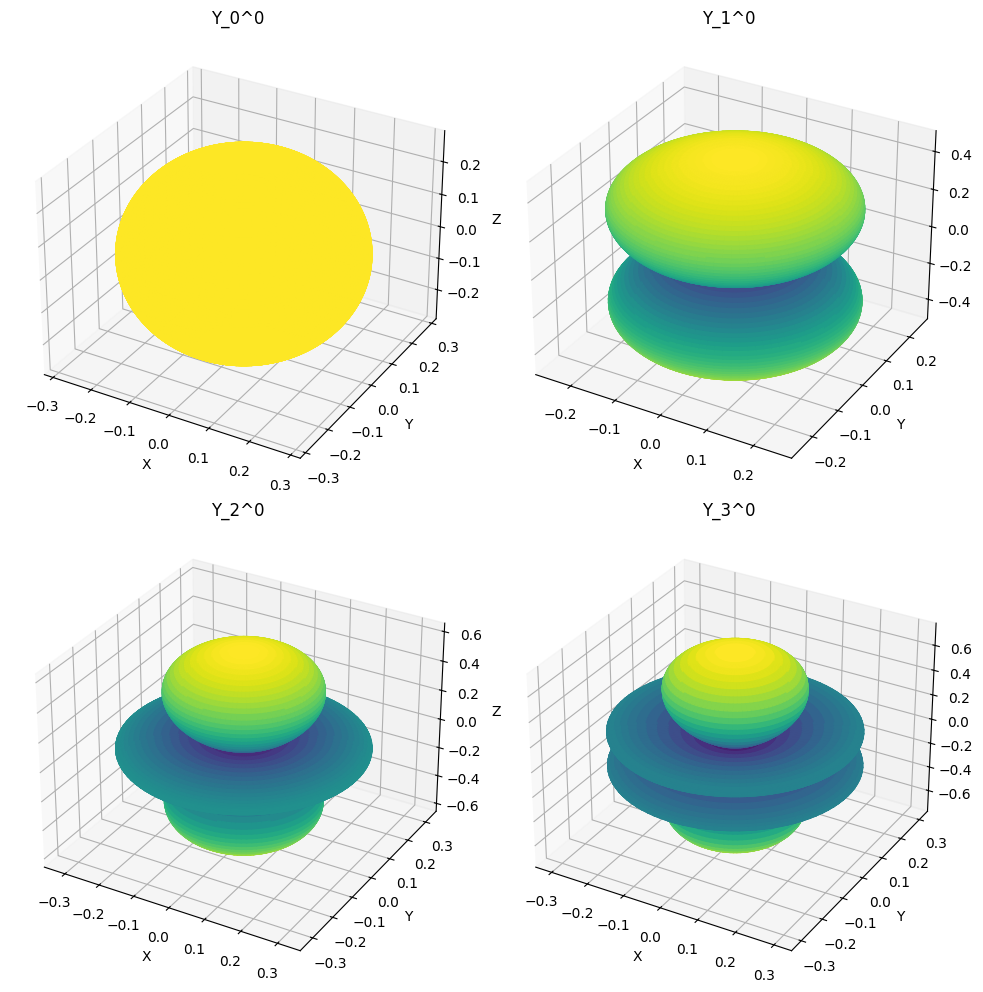

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

def plot_multiple_spherical_harmonics(l_m_pairs):
    # Determine grid size for subplots
    num_plots = len(l_m_pairs)
    cols = int(np.ceil(np.sqrt(num_plots)))  # Number of columns
    rows = int(np.ceil(num_plots / cols))   # Number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, subplot_kw={'projection': '3d'}, figsize=(5 * cols, 5 * rows))
    axes = np.array(axes).flatten()  # Flatten for easy iteration

    for idx, (l, m) in enumerate(l_m_pairs):
        ax = axes[idx]

        # Create a grid of theta (colatitude) and phi (longitude) values
        theta = np.linspace(0, np.pi, 100)  # Colatitude
        phi = np.linspace(0, 2 * np.pi, 100)  # Longitude
        theta, phi = np.meshgrid(theta, phi)

        # Compute the spherical harmonic
        Y_lm_complex = sph_harm(m, l, phi, theta)
        if m > 0:
            Y_lm = (Y_lm_complex.real) * np.sqrt(2)
        elif m < 0:
            Y_lm = (Y_lm_complex.imag) * np.sqrt(2)
        else:  # m == 0
            Y_lm = Y_lm_complex.real

        # Convert to Cartesian coordinates
        r = np.abs(Y_lm)
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)

        # Normalize colors
        color_norm = np.abs(Y_lm) / np.max(np.abs(Y_lm))

        # Plot on the current subplot
        ax.plot_surface(x, y, z, rstride=1, cstride=1,
                        facecolors=plt.cm.viridis(color_norm),
                        antialiased=True, shade=False)

        # Add labels and title
        ax.set_title(f"Y_{l}^{m}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

    # Hide unused subplots
    for i in range(num_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
plot_multiple_spherical_harmonics([(0, 0), (1,0), (2, 0), (3,0)])
